추론 feed forward에 필요한 파이썬 모듈 로딩 

In [19]:
from tensorflow.keras.models import load_model  # TensorFlow is required for Keras to work
import cv2  # Install opencv-python
import numpy as np
from google.colab.patches import cv2_imshow

mnist 추론 파일을 로드하기. 추론파일은 트레이닝된 계수들의 배열임 

In [20]:
# Load the model
model = load_model("mnist.h5", compile=False)

내가 만든 숫자 이미지를 로딩하기 

In [21]:
image = cv2.imread('4.png')


로딩한 숫자를 확인하기 

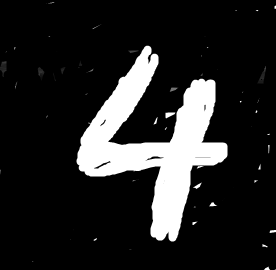

In [23]:
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

mnist 데이터에 맞게 리사이징 하기 

In [24]:
image = cv2.resize(image, (28,28))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)

(28, 28)


리사이즈한 이미지를 확인

In [25]:
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

이미지를 flattening 하기 

In [26]:
print(image.shape)
image = np.reshape(image, (784, ))
print(image.shape)

(28, 28)
(784,)


노말라이징 하기 

In [27]:
print(image)
image = image.astype('float')/255.0
print(image)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0   0   0
   0   0   0   0   0   0   0   0   0  13 255   7   0   0   0   0   0   0
   0   0   0   0   0   0  54   0   0   0   0   0   0   0   0   0   0   0
   0   0 255 255   0   0   0   0   0   0   0   0   0   0   0   0   9   0
   0   0  14   0   1   0   0   0   0   0   0 255 255 255   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 255 255 255   0   0   0   0 162 255 255   

추론 파일에 입력해서 결과 얻기 

In [28]:
X = np.asarray([image])
predictions = model(X, training=False)
print(predictions)

tf.Tensor(
[[2.1816892e-04 3.6214681e-07 7.4842788e-04 4.1906853e-04 9.1532815e-01
  5.7617010e-04 1.5353052e-03 9.3399035e-04 1.6235892e-03 7.8616917e-02]], shape=(1, 10), dtype=float32)
4


추론한 결과 값에서 라벨값(숫자)를 얻기 


In [29]:
print(np.argmax(predictions))

4
